In [3]:
# Importing Libraries

# data analysis and wrangling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading
import os

# Machine Learning
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

In [4]:
# Loading dataset
os.chdir("C:\\04-AIML\\07 Unsupervised Learning")
df = pd.read_excel("Part2 - Company.xlsx")

In [6]:
# Shape of datasets
df.shape
print("Dataset Shape is :",df.shape)

Dataset Shape is : (61, 5)


In [7]:
# Size of datasets
df.shape
print("Dataset Size is :",df.size)

Dataset Size is : 305


In [3]:
# Header Information
df.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [4]:
# Find the missing Value
df.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [5]:
# Copy Dataframe
df1=df.copy()

In [6]:
# Dropping Quality Attribute
df1.drop(['Quality'],axis=1,inplace=True)
df1

,A,B,C,D
0,47,27,45,108
1,174,133,134,166
2,159,163,135,131
3,61,23,3,44
4,59,60,9,68
...,...,...,...,...
56,200,186,185,179
57,137,182,165,199
58,88,39,9,102
59,180,157,192,198


In [7]:
# Check for Missing Values
df1.isnull().sum()

A    0
B    0
C    0
D    0
dtype: int64

In [19]:
df['Quality'].value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

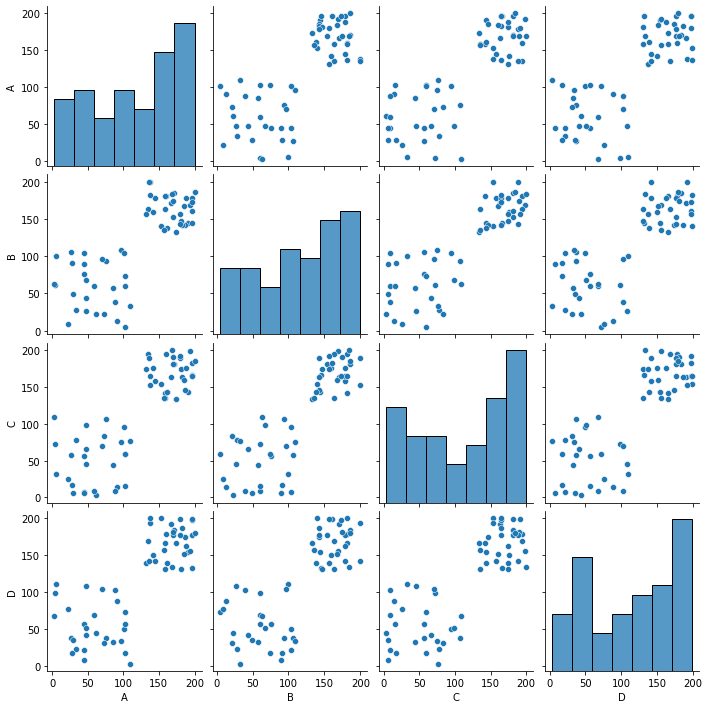

In [25]:
sns.pairplot(df)

In [21]:
#scaling the numeric variables
from scipy.stats import zscore
df2 = df1.apply(zscore)
df2.head()

,A,B,C,D
0,-1.168034,-1.561080,-1.061569,-0.103138
1,0.904992,0.284923,0.306077,0.823013
2,0.660147,0.807376,0.321443,0.264129
3,-0.939512,-1.630740,-1.706975,-1.125099
4,-0.972158,-0.986381,-1.614775,-0.741864


In [32]:
X = df1
y = df['Quality']

C:\Users\srikanthve\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


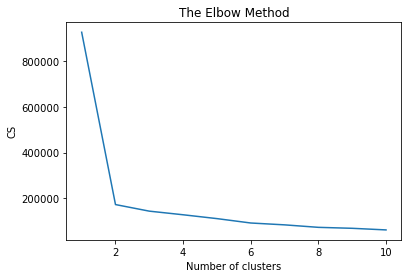

In [42]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [52]:
#applying kmeans with 2 centroids
k_means = KMeans(n_clusters = 2)
k_means.fit(df1)
labels = k_means.labels_

In [53]:
#Adding Cluster Feature
df["Cluster"] = labels
df.head(20)

,A,B,C,D,Quality,Cluster
0,47,27,45,108,Quality A,1
1,174,133,134,166,Quality B,0
2,159,163,135,131,NaN,0
3,61,23,3,44,Quality A,1
4,59,60,9,68,Quality A,1
5,153,140,154,199,NaN,0
6,34,28,78,22,Quality A,1
7,191,144,143,154,NaN,0
8,160,181,194,178,Quality B,0
9,145,178,158,141,NaN,0


In [67]:
#Replacing with the cluster labels
df['Cluster'] = df['Cluster'].replace({0: 'Quality A', 1: 'Quality B'})
df

,A,B,C,D,Quality,Cluster
0,47,27,45,108,Quality A,Quality B
1,174,133,134,166,Quality B,Quality A
2,159,163,135,131,NaN,Quality A
3,61,23,3,44,Quality A,Quality B
4,59,60,9,68,Quality A,Quality B
...,...,...,...,...,...,...
56,200,186,185,179,Quality B,Quality A
57,137,182,165,199,NaN,Quality A
58,88,39,9,102,NaN,Quality B
59,180,157,192,198,NaN,Quality A


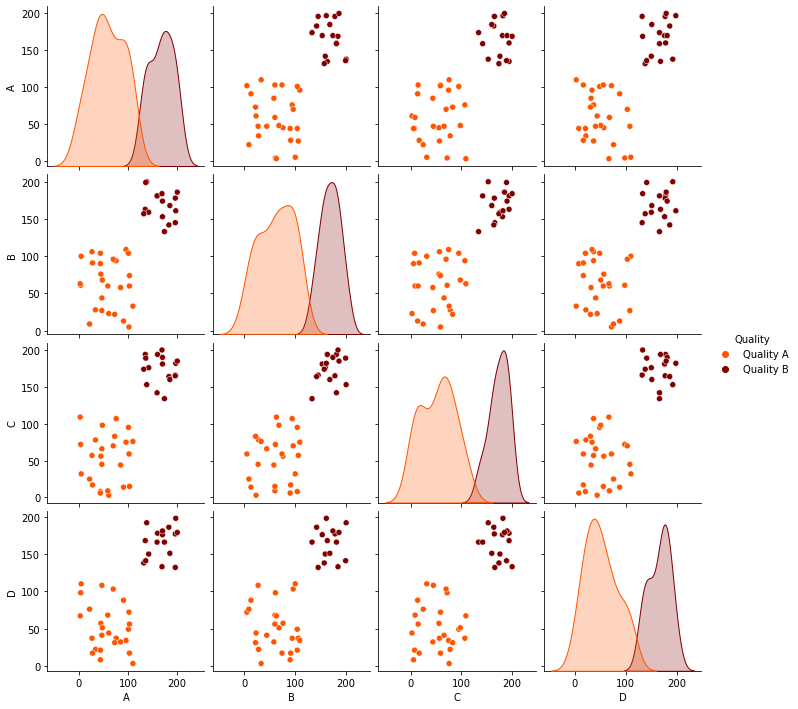

In [69]:
sns.pairplot(df, diag_kind='kde', hue='Quality', palette='gist_heat_r')

In [86]:
#dropping Missing Value
df=df.dropna()

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 56
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        43 non-null     int64 
 1   B        43 non-null     int64 
 2   C        43 non-null     int64 
 3   D        43 non-null     int64 
 4   Quality  43 non-null     object
 5   Cluster  43 non-null     object
dtypes: int64(4), object(2)
memory usage: 2.4+ KB


In [90]:
df.shape

(43, 6)

In [87]:
y_pred = df['Cluster']
y_actual = df['Quality']

<AxesSubplot:>

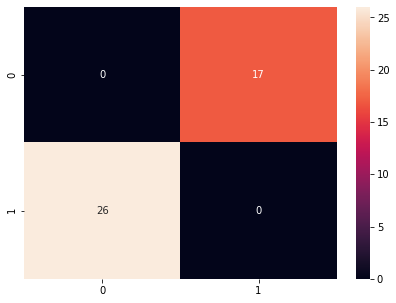

In [88]:
cm=metrics.confusion_matrix(y_pred,y_actual)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True)

There is Zero misclassifcation and hence the likelihood of the quality prediction would be accurate
and can be considered as a target variable